<a href="https://colab.research.google.com/github/politecat314/image_classifier/blob/main/horses_or_humans_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

## Import dataset

In [ ]:
# train dataset
train_ds, info = tfds.load('horses_or_humans', split='train', with_info=True, as_supervised=True)

# validation dataset
val_ds, test_info = tfds.load('horses_or_humans', split='test', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1027 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/horses_or_humans/3.0.0.incomplete7IATZA/horses_or_humans-train.tfrecord*...:  …

Generating test examples...:   0%|          | 0/256 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/horses_or_humans/3.0.0.incomplete7IATZA/horses_or_humans-test.tfrecord*...:   …

Dataset horses_or_humans downloaded and prepared to ~/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


## Display the dataset

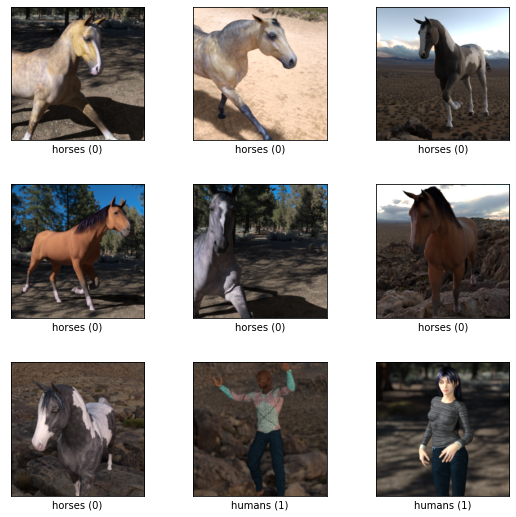

In [ ]:
fig = tfds.show_examples(train_ds, info)

In [ ]:
label_names = info.features['label'].names
label_names

['horses', 'humans']

## Preprocessing function

In [ ]:
# Defining a few hyperparameters
IMG_SIZE = 300
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE


# We can define the Resizing and Rescaling
resize_and_rescale = tf.keras.Sequential([
    # tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])

# A function that resizes, rescales, batches and shuffles
def prepare_images(ds, shuffle=False,):
  
  # Resize and rescale the dataset.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y),
              num_parallel_calls=AUTOTUNE)

  # Shuffles the dataset
  if shuffle:
    ds = ds.shuffle(1000)
  
  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
## Let us resize and rescale the images in our dataset
train_ds = prepare_images(train_ds, shuffle=True)
val_ds = prepare_images(val_ds)

## Model code

In [ ]:
## A simple CNN based model
def create_cnn_model():
  model = tf.keras.Sequential([
                tf.keras.layers.Conv2D(16, (2,2), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Conv2D(128, (2, 2), activation='relu'),
                tf.keras.layers.MaxPool2D(2, 2),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(512, activation='relu'),
                tf.keras.layers.Dense(2, activation='softmax')
])
  model.compile(loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'],
                      optimizer='adam'
                      )
  return model

In [ ]:
# create model
model = create_cnn_model()

# Early Stopping callback
ES = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights='True'
)

In [ ]:
# Train the model
model.fit(train_ds, #train_ds,
          epochs=10,
          validation_data=val_ds,
          callbacks=[ES]
          )

Epoch 1/10
33/33 [==============================] - 76s 2s/step - loss: 0.7319 - accuracy: 0.7274 - val_loss: 2.2740 - val_accuracy: 0.6328
Epoch 2/10
33/33 [==============================] - 73s 2s/step - loss: 0.1033 - accuracy: 0.9649 - val_loss: 1.6542 - val_accuracy: 0.7031
Epoch 3/10
33/33 [==============================] - 89s 3s/step - loss: 0.0254 - accuracy: 0.9922 - val_loss: 1.6989 - val_accuracy: 0.7812
Epoch 4/10
33/33 [==============================] - 80s 2s/step - loss: 0.0071 - accuracy: 0.9990 - val_loss: 1.6106 - val_accuracy: 0.8281
Epoch 5/10
33/33 [==============================] - 76s 2s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.9201 - val_accuracy: 0.8125
Epoch 6/10
33/33 [==============================] - 83s 2s/step - loss: 4.8529e-04 - accuracy: 1.0000 - val_loss: 2.0672 - val_accuracy: 0.8086
Epoch 7/10
33/33 [==============================] - 79s 2s/step - loss: 3.3065e-04 - accuracy: 1.0000 - val_loss: 2.2997 - val_accuracy: 0.7891
Epoch 7: ear

## Inference function

In [ ]:
def inference_function(image_path):
  """
  image_path (str): path of the image file

  returns index, probability
  img (PIL.Image.Image): the image from the image_path
  index (int): the class the image belongs to
  probability (float): the probability for that class
  """

  img = tf.keras.utils.load_img(
      image_path, target_size=(YOUR_IMAGE_HEIGHT, YOUR_IMAGE_WIDTH) # MODIFY IMAGE HEIGHT AND WIDTH
  )

  # convert the img to an array. Refer to documentation: https://www.tensorflow.org/api_docs/python/tf/keras/utils/img_to_array
  img_array = # YOUR CODE HERE

  # apply your rescaling preprocessing step
  img_array = img_array*(1./255)

  # create a batch
  img_array = tf.expand_dims(img_array, 0)

  # run the img_array through your model. Hint: use the model.predict() function
  predictions = # YOUR CODE HERE

  # remove batch
  pred = np.squeeze(predictions)
  
  # index of the highest probability element of pred array. 
  # Hint 1: use argmax function: https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
  # Hint 2: printing and seeing what the pred array looks like may help you
  index = # YOUR CODE HERE

  # highest probability in pred array
  probability = # YOUR CODE HERE

  return img, index, probability

horses 0.9999999


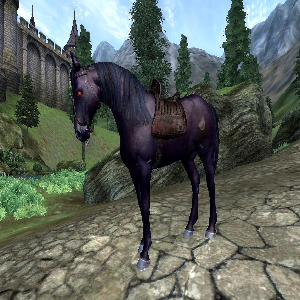

In [ ]:
# run the inference function on your test image
img, class_index, class_probability = inference_function("your test image.jpg")

# name of the class the image belongs to
class_name = # YOUR CODE HERE

print(class_name, class_probability)
img

In [ ]:
# this is code version 2